# Project No. 1 - MNIST
### Authors:
M. Alejandro Villalobos C.
Oscar Ruiz Ramirez
Sofia Vargas Aceves
### Fecha:
14 de Febrero, 2022
### Description:
Primer proyecto Machine Learning. 5 diferentes modelos que reconocen digitos escritos a mano (0-9)

## 1. Read Data


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,as_frame= False)

### Structure of the data

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#Data es un arreglo que contiene 70,000 imagenes de 784 pixeles (28*28)
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
#Target es un arreglo que contiene 70,000 etiquetas para las imagenes de data
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
mnist.target.shape

(70000,)

## 2. Data Preprocessing

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Visualizando

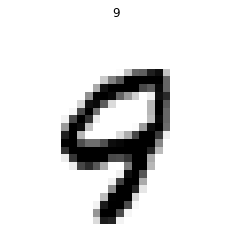

In [11]:
#visualizamos un numero en X y su etiqueta para asegurarnos que funcione
import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = 42069
any_digit_image = X[un_numero].reshape(28,28)
plt.imshow(any_digit_image,cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.title(y[un_numero])

plt.show()

### Training y test set:

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [13]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
#Aqui haremos las variables especialmente para el modelo CNN, ya que se necesita estar en 3 dimensiones, 28 x 28 x 1
#Normalizing image to [0,1]
#X_trainCNN = X_train.astype(np.float32)/255
#X_testCNN = X_test.astype(np.float32)/255

#Expand dmension of image to 28,28,1
#X_train = np.expand_dims(X_trainCNN, -1)
#X_test = np.expand_dims(X_testCNN, -1)


X_trainCNN = X_train.reshape(60000,28,28,1)
X_testCNN = X_test.reshape(10000,28,28,1)

In [15]:
y_test.shape

(10000,)

In [16]:
y_train.shape

(60000,)

## 3. Model Creation

### Model #1 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=50.0 / y_train.shape[0], penalty="l1", solver="saga", tol=0.1)

### Model #2 Support Vector Machine (SVM)

In [18]:
from sklearn import svm
SVM = svm.SVC()

### Model #3 Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [20]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()

### Model #5 Convolutional Neural Network (CNN)

import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras 
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

#convert classes to one hot vectors
y_trainCNN = keras.utils.to_categorical(y_train)
y_testCNN = keras.utils.to_categorical(y_test)

CNN = Sequential()

CNN.add(Conv2D(64, kernel_size=3, input_shape=(28,28,1), activation='relu'))
CNN.add(Conv2D(32, kernel_size=3, activation='relu'))

CNN.add(Flatten())
CNN.add(Dense(10, activation='softmax'))

CNN.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
y_train[0]

'5'

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras 
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, Flatten, MaxPooling2D

#convert classes to one hot vectors
y_trainCNN = keras.utils.to_categorical(y_train)
y_testCNN = keras.utils.to_categorical(y_test)


CNN = Sequential()
CNN.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(64, (3,3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(64, (3,3), activation='relu'))

CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
##keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[['accuracy']])

In [23]:
CNN.summary() #122570

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [24]:
X_testCNN[1].shape

(28, 28, 1)

## 4. Training: Adjust Model with Historic Data

### Model #1 Logistic Regression

In [25]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.0008333333333333334, penalty='l1', solver='saga',
                   tol=0.1)

### Model #2 Support Vector Machine (SVM)

In [27]:
SVM.fit(X_train, y_train)

SVC()

### Model #3 Random Forest

In [38]:
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [37]:
MLP.fit(X_train, y_train)

MLPClassifier()

### Model #5 Convolutional Neural Network (CNN)

In [39]:
CNN_H = CNN.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2202 - accuracy: 0.9480 - val_loss: 0.0797 - val_accuracy: 0.9763
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.0639 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0788 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0679 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0551 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0418 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0575 -

## 5. Prediction for New Data

In [40]:
#Para visualizar tablas
import pandas as pd

### Model #1 Logistic Regression

In [41]:
y_predictLR = LR.predict(X_test)

In [42]:
data = [ y_test[:20], y_predictLR[:20]]
pd.DataFrame(data, index = ["Expected label","LR Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
LR Prediction,7,2,1,0,4,1,4,9,6,9,0,6,9,0,1,5,9,7,3,4


### Model #2 Support Vector Machine (SVM)

In [31]:
y_predictSVM = SVM.predict(X_test)

In [43]:
data = [ y_test[:20], y_predictSVM[:20]]
pd.DataFrame(data, index = ["Expected label","SVM Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
SVM Prediction,7,2,1,0,4,1,4,9,6,9,0,6,9,0,1,5,9,7,3,4


### Model #3 Random Forest

In [44]:
y_predictRF = RFC.predict(X_test)

In [45]:
data = [ y_test[:20], y_predictRF[:20]]
pd.DataFrame(data, index = ["Expected label","RF Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
RF Prediction,7,2,1,0,4,1,4,9,6,9,0,6,9,0,1,5,9,7,3,4


### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [46]:
y_predictMLP = MLP.predict(X_test)

In [47]:
data = [ y_test[:20], y_predictMLP[:20]]
pd.DataFrame(data, index = ["Expected label","MLP Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
MLP Prediction,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4


### Model #5 Convolutional Neural Network (CNN)

In [52]:
y_predictCNN = CNN.predict_classes(X_testCNN)

In [54]:
## Warning de línea superior
np.argmax(CNN.predict(X_testCNN), axis = -1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [55]:
data = [ y_test[:20], y_predictCNN[:20]]
pd.DataFrame(data, index = ["Expected label","CNN Prediction"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Expected label,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4
CNN Prediction,7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,9,4


## 6. Visualization of Results

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Model #1 Logistic Regression

In [57]:
CV_LR = cross_val_score(LR, X_train, y_train, cv=3, scoring = "accuracy")

In [58]:
AS_LR = accuracy_score(y_test,y_predictLR)

### Model #2 Support Vector Machine (SVM)

In [36]:
CV_SVM = cross_val_score(SVM, X_train, y_train, cv=3, scoring = "accuracy")

In [59]:
AS_SVM = accuracy_score(y_test,y_predictSVM)

### Model #3 Random Forest

In [60]:
CV_RF = cross_val_score(RFC, X_train, y_train, cv=3, scoring = "accuracy")

In [61]:
AS_RF = accuracy_score(y_test,y_predictRF)

### Model #4 Neural Network: MultiLayer Perceptron (MLP)

In [62]:
CV_MLP = cross_val_score(MLP, X_train, y_train, cv=3, scoring = "accuracy")

In [63]:
AS_MLP = accuracy_score(y_test,y_predictMLP)

### Model #5 Convolutional Neural Network (CNN)

In [64]:
CV_CNN = CNN.evaluate(X_trainCNN, y_trainCNN)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0217 - accuracy: 0.9939


In [65]:
AS_CNN = CNN.evaluate(X_testCNN, y_testCNN)

313/313 [==============================] - 2s 6ms/step - loss: 0.0572 - accuracy: 0.9870


## Conclusions

### Tables

In [66]:
models = ["LR","SVM", "RF", "MLP", "CNN"]
AS_values = [AS_LR, AS_SVM, AS_RF, AS_MLP, AS_CNN[1]]
CV_values = [CV_LR, CV_SVM, CV_RF, CV_MLP, [CV_CNN[1],'-','-']]

data = {"Accuracy Scores": AS_values, "Cross Validations": CV_values}
df = pd.DataFrame(data, index = models)

dfCV = pd.DataFrame(df['Cross Validations'].to_list(), columns=['CV #1','CV #2','CV #3'], index = models)
dfCV.insert(0,'CV AVG', dfCV[['CV #1','CV #2','CV #3']].mean(axis=1, numeric_only=True))

dfAcc = pd.concat([df['Accuracy Scores'], dfCV], axis=1)
dfAcc

,Accuracy Scores,CV AVG,CV #1,CV #2,CV #3
LR,0.9233,0.91620,0.91620,0.9121,0.91725
SVM,0.9792,0.97700,0.97700,0.9738,0.9739
RF,0.9480,0.94005,0.94005,0.93995,0.94205
MLP,0.9670,0.95915,0.95915,0.95575,0.9599
CNN,0.9870,0.99390,0.99390,-,-


### Graphs

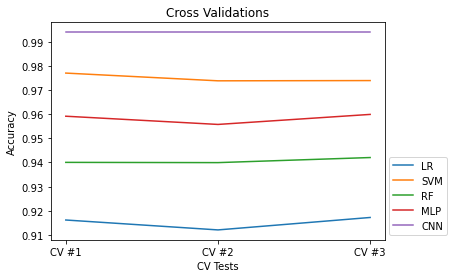

In [76]:
CV_Iter = ["CV #1", "CV #2","CV #3"]

fig, ax = plt.subplots()
ax.plot(CV_Iter, CV_LR, label="LR")
ax.plot(CV_Iter, CV_SVM, label="SVM")
ax.plot(CV_Iter, CV_RF, label="RF")
ax.plot(CV_Iter, CV_MLP, label="MLP")
ax.plot(CV_Iter, np.full((3), CV_CNN[1]), label="CNN")
plt.title("Cross Validations")
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel('CV Tests')
plt.ylabel('Accuracy')

plt.show()

(0.8, 1.0)

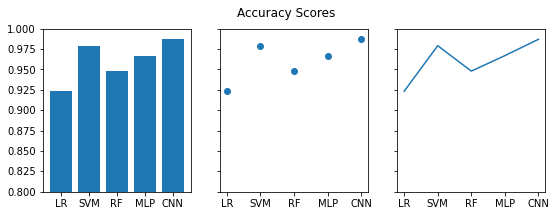

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(models, AS_values)
axs[1].scatter(models, AS_values)
axs[2].plot(models, AS_values)
fig.suptitle('Accuracy Scores')
plt.ylim([0.8, 1])

In [ ]:
##Tabla con cv avg y accuracy score?

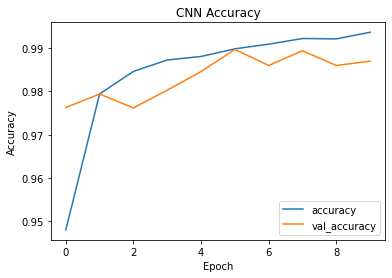

In [71]:
plt.title("CNN Accuracy")
plt.plot(CNN_H.history['accuracy'], label='accuracy')
plt.plot(CNN_H.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### References

(1) :^D